In [1]:
import os

os.chdir("../../../test_data/system_tests/proteoforms/mann_labs_egfr")

In [7]:
results_egf_treated_25_to_100 = "./results_sample_amounts/HeLa_EGF_25ng_VS_HeLa_EGF_100ng.results.tsv"
results_egf_treated_400_to_100 = "./results_sample_amounts/HeLa_EGF_400ng_VS_HeLa_EGF_100ng.results.tsv"

results_untreated_25_to_100 = "./results_sample_amounts/HeLa_unt_25ng_VS_HeLa_unt_100ng.results.tsv"
results_untreated_400_to_100 = "./results_sample_amounts/HeLa_unt_400ng_VS_HeLa_unt_100ng.results.tsv"

RESULTS_DIR = "./results_sample_amounts/"
CONDPAIR_25_TO_100 = ()


,condpair_25_to_100,protein,fdr_25_to_100,pval_25_to_100,log2fc_25_to_100,consistency_score_25_to_100,num_ions_25_to_100,pseudoint1_25_to_100,pseudoint2_25_to_100,predscore_25_to_100,condpair_100_to_400,fdr_100_to_400,pval_100_to_400,log2fc_100_to_400,consistency_score_100_to_400,num_ions_100_to_400,pseudoint1_100_to_400,pseudoint2_100_to_400,predscore_100_to_400
0,HeLa_EGF_25ng_VS_HeLa_EGF_100ng,Q9P2R3;Q9P2R3-4,4.746649e-06,4.443853e-07,-1.141846,10.909091,48,3.108983e+06,3.495219e+06,-1.222489,HeLa_EGF_400ng_VS_HeLa_EGF_100ng,3.894883e-06,3.371262e-07,0.915280,25.833333,124,7.406742e+07,5.988741e+07,0.504102
1,HeLa_EGF_25ng_VS_HeLa_EGF_100ng,P60709,7.237828e-01,4.865537e-01,-0.203374,69.815789,379,3.992487e+09,4.883606e+09,-1.467058,HeLa_EGF_400ng_VS_HeLa_EGF_100ng,9.735484e-15,2.220446e-16,2.113149,54.800000,548,6.684245e+10,6.107759e+10,0.511759
2,HeLa_EGF_25ng_VS_HeLa_EGF_100ng,Q5JPE7;Q5JPE7-2,7.204218e-01,4.832399e-01,0.051332,29.714286,128,1.816346e+07,1.948251e+07,-1.310082,HeLa_EGF_400ng_VS_HeLa_EGF_100ng,2.695099e-12,8.437695e-14,0.535024,50.009896,319,4.227577e+08,3.582363e+08,0.555045
3,HeLa_EGF_25ng_VS_HeLa_EGF_100ng,P00338;P00338-3,1.918924e-10,1.058598e-11,-0.570891,56.000000,192,6.632199e+08,7.466027e+08,-1.308246,HeLa_EGF_400ng_VS_HeLa_EGF_100ng,9.735484e-15,2.220446e-16,1.797306,55.928571,261,1.107193e+10,9.364638e+09,0.506382
8,HeLa_EGF_25ng_VS_HeLa_EGF_100ng,Q9UK59,2.543996e-05,2.660567e-06,-1.779962,12.500000,40,3.490935e+06,3.859501e+06,-1.420880,HeLa_EGF_400ng_VS_HeLa_EGF_100ng,2.593528e-03,4.739554e-04,0.674119,30.970588,117,8.135318e+07,6.775518e+07,0.518960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,HeLa_EGF_25ng_VS_HeLa_EGF_100ng,Q9Y217,7.502409e-01,5.175517e-01,-0.230587,1.000000,1,1.522798e+03,1.786717e+03,-1.534794,HeLa_EGF_400ng_VS_HeLa_EGF_100ng,4.522415e-03,9.052518e-04,0.722357,7.500000,28,6.640220e+06,5.297663e+06,0.604605
5543,HeLa_EGF_25ng_VS_HeLa_EGF_100ng,P32321;P32321-2,1.189209e-04,1.408246e-05,-2.568138,2.000000,2,2.677538e+04,1.587897e+05,-1.207083,HeLa_EGF_400ng_VS_HeLa_EGF_100ng,4.180928e-01,2.376696e-01,-0.807878,7.875000,21,8.448458e+06,6.323382e+06,0.516808
5546,HeLa_EGF_25ng_VS_HeLa_EGF_100ng,Q9UHN6,9.552474e-01,8.686896e-01,-0.041429,2.000000,2,7.404378e+04,7.620085e+04,-1.525182,HeLa_EGF_400ng_VS_HeLa_EGF_100ng,5.071639e-03,1.032433e-03,0.568180,7.222222,26,1.113458e+07,8.199126e+06,0.029758
5551,HeLa_EGF_25ng_VS_HeLa_EGF_100ng,Q86VS8,1.250727e-01,4.020754e-02,-0.581418,1.000000,1,3.816936e+04,5.711356e+04,-1.575791,HeLa_EGF_400ng_VS_HeLa_EGF_100ng,4.412956e-06,3.900956e-07,2.068057,9.000000,27,5.936436e+06,4.640146e+06,0.506432


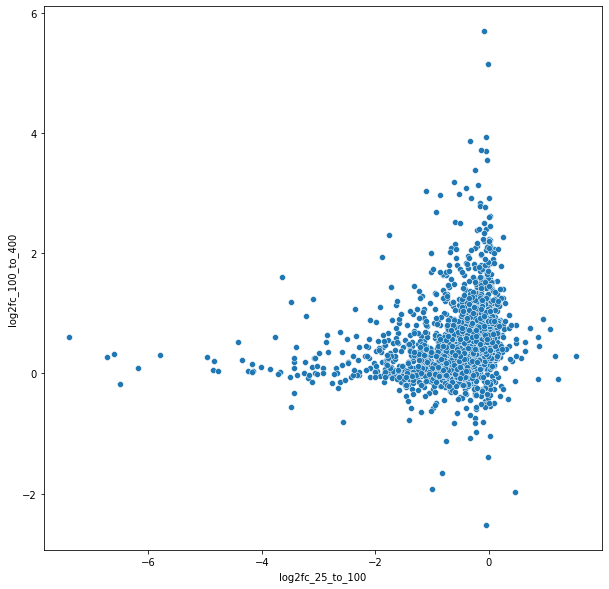

In [6]:
#compare up and downregulated proteins

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_venn as venn
import alphaquant.diffquant_utils as aqutils

condpairtree_proteome_25_to_100 = aqutils.read_condpair_tree(cond1=CONDPAIR[0], cond2=CONDPAIR[1], results_folder=RESULTS_DIR_PROTEOME)

results_egf_treated_25_to_100_df = pd.read_csv(results_egf_treated_25_to_100, sep='\t')
results_egf_treated_400_to_100_df = pd.read_csv(results_egf_treated_400_to_100, sep='\t')

#
merged_df = pd.merge(results_egf_treated_25_to_100_df, results_egf_treated_400_to_100_df, on='protein', how='inner', suffixes=('_25_to_100', '_100_to_400'))

merged_df = merged_df[(merged_df["fdr_25_to_100"]<0.01) | (merged_df["fdr_100_to_400"]<0.01)]

display(merged_df)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.scatterplot(data=merged_df, x='log2fc_25_to_100', y='log2fc_100_to_400', ax=ax)
plt.show()

significantly_off_25_to_100 = merged_df[(merged_df["fdr_25_to_100"]<0.01) & (merged_df["log2fc_25_to_100"]>0.7)][""]
significantly_off_100_to_400 = merged_df[(merged_df["fdr_100_to_400"]<0.01) & (merged_df["log2fc_100_to_400"]>0.7)]

venn.venn2()

